In [1]:
%cd ..

/workspaces/mlops-student-performance


/home/codespace/.local/share/virtualenvs/mlops-student-performance-Zsm4y_dL/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import math

sns.set_theme()


In [3]:
path_csv = "data/raw/StudentPerformanceFactors.csv"
student_df = pd.read_csv(path_csv)
student_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [4]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
student_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [6]:
student_df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

# Clean Data

In [7]:
print(f"Length of the dataframe: {student_df.shape[0]}")
student_cleaned_df = student_df.dropna()
student_original_df = student_cleaned_df.copy()
nan_values = student_df.shape[0] - student_cleaned_df.shape[0]
print(f"Numer of NaN values: {nan_values}")
print(f"Length of the cleaned dataset: {student_cleaned_df.shape[0]}")

Length of the dataframe: 6607
Numer of NaN values: 229
Length of the cleaned dataset: 6378


# Get numerical and categorical columns

In [8]:
num_cols = student_df.select_dtypes(include=[np.number]).columns
cat_cols = student_df.select_dtypes(include=['object', 'category']).columns

print(cat_cols)
print(num_cols)

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')
Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')


# Histograms of numerical data

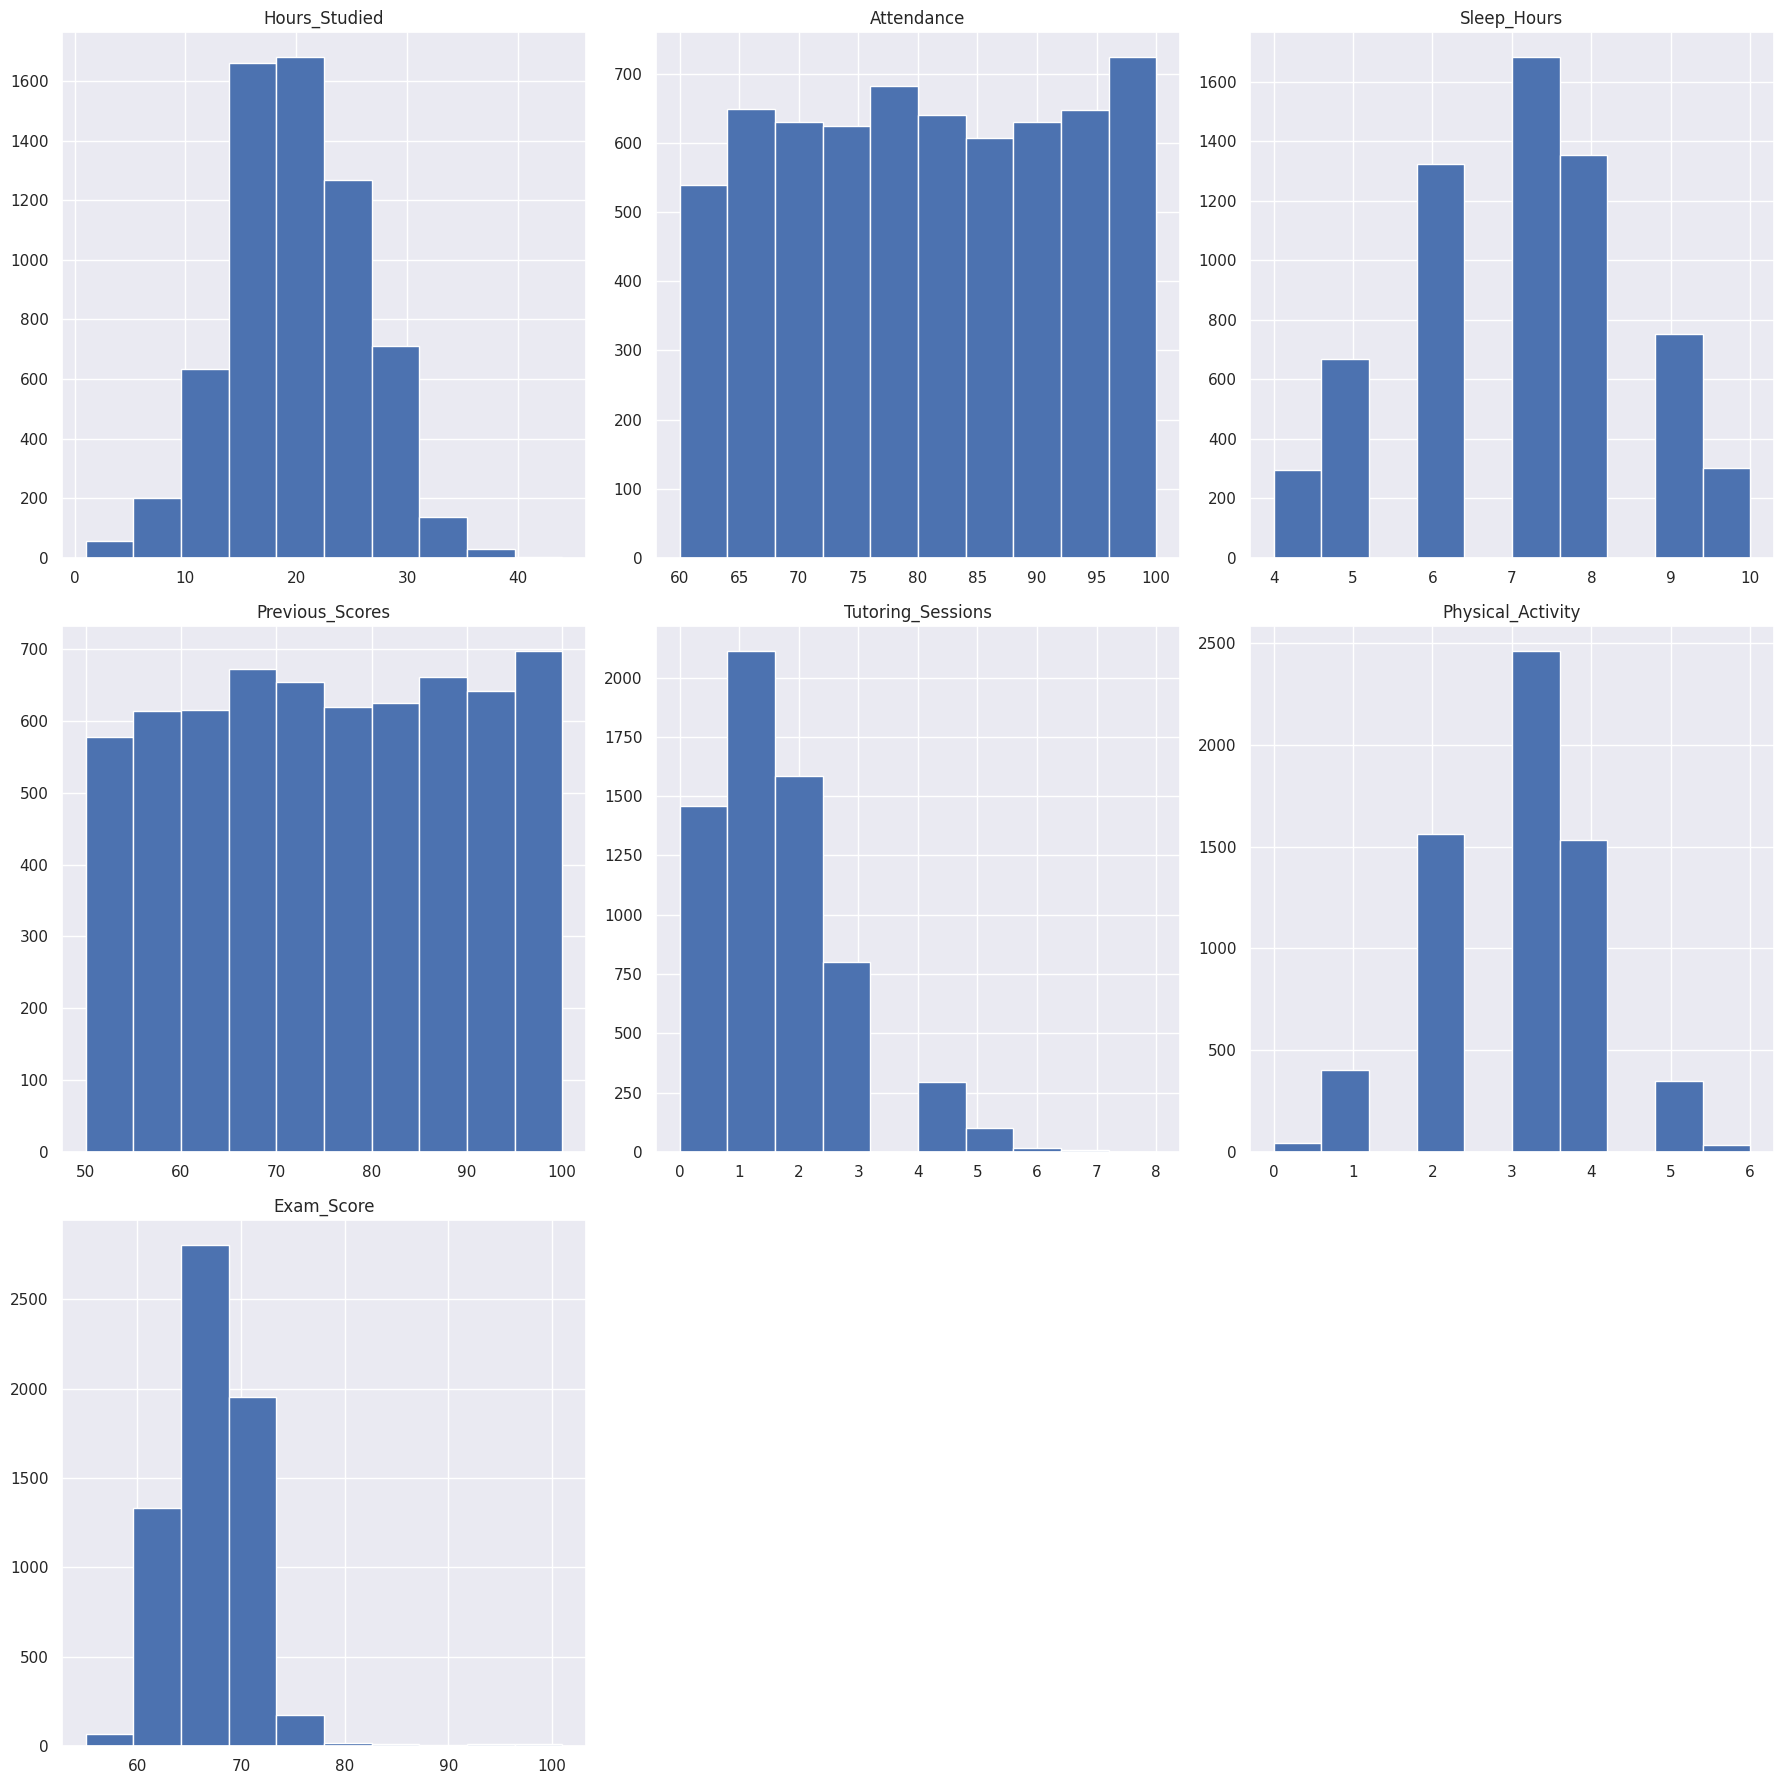

In [9]:
student_cleaned_df[num_cols].hist(figsize=(18, 18))
plt.tight_layout()

# Histograms of categorical data

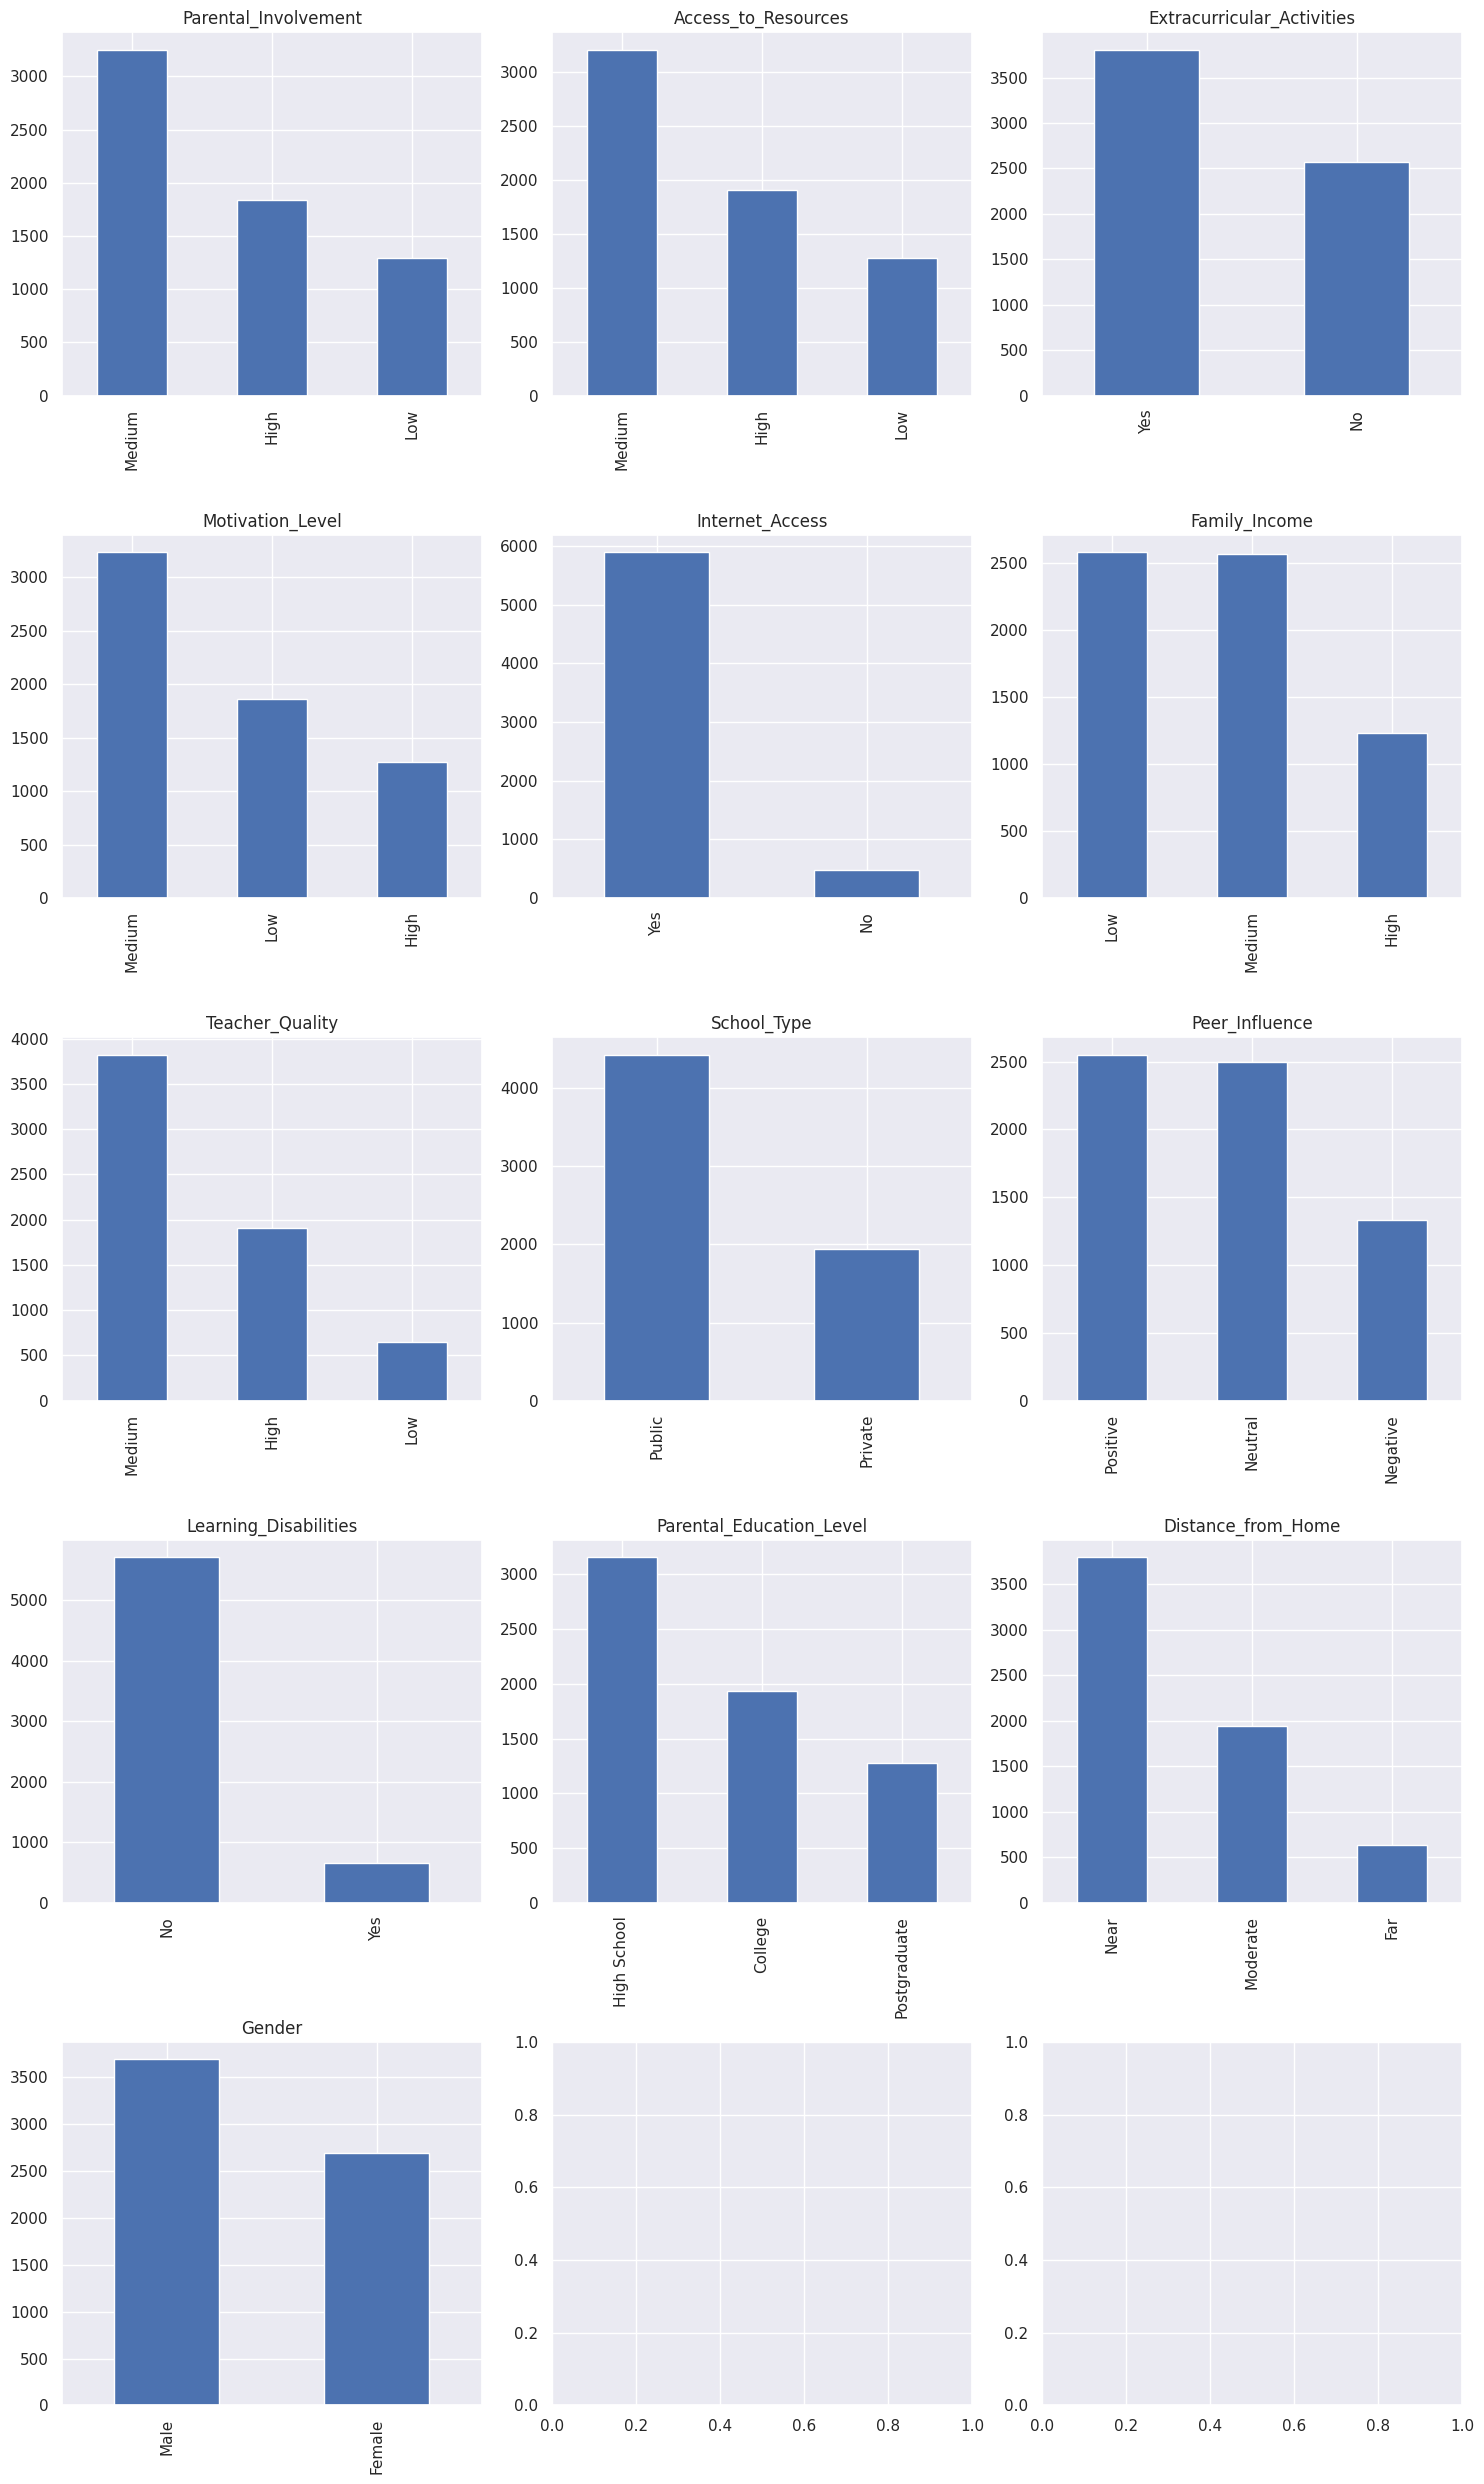

In [10]:
num_plots = len(cat_cols)
num_rows = math.ceil(num_plots / 3)
fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

axs = axs.flatten()

for i, column in enumerate(cat_cols):
    ax = axs[i]
    student_cleaned_df[column].value_counts().plot(
        kind='bar',
        ax=ax,
        title=column,
        xlabel=''
    )
plt.tight_layout()

In [11]:
student_cleaned_df[cat_cols]

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,High,Medium,No,Medium,Yes,High,Medium,Public,Positive,No,High School,Near,Female
6603,High,Medium,No,Medium,Yes,Low,High,Public,Positive,No,High School,Near,Female
6604,Medium,Low,Yes,Low,Yes,Low,Medium,Public,Negative,No,Postgraduate,Near,Female
6605,High,High,Yes,High,Yes,Low,Medium,Private,Positive,No,High School,Far,Female


# Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

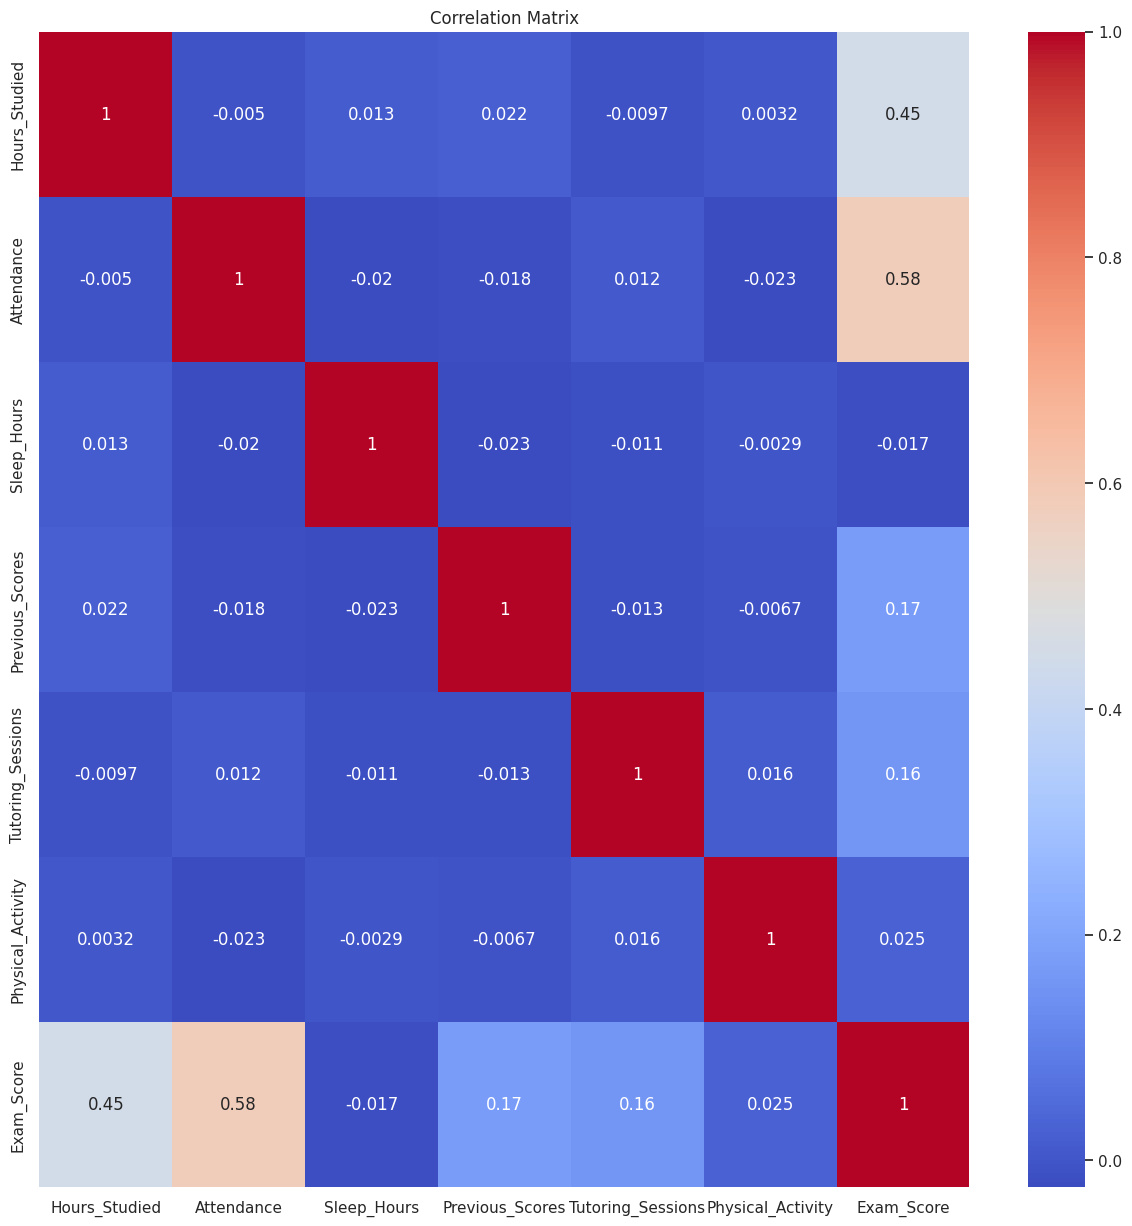

In [12]:
plt.figure(figsize=(15, 15))
sns.heatmap(student_cleaned_df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")

# Encode categorical feature

In [13]:
from sklearn.preprocessing import OrdinalEncoder

ord_encoder = OrdinalEncoder()

student_cleaned_df.loc[:, cat_cols] = ord_encoder.fit_transform(student_cleaned_df[cat_cols])
student_cleaned_df.to_csv("data/processed/StudentPerformanceFactors.csv", index=False)
student_cleaned_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1.0,0.0,0.0,7,73,1.0,1.0,0,1.0,2.0,1.0,2.0,3,0.0,1.0,2.0,1.0,67
1,19,64,1.0,2.0,0.0,8,59,1.0,1.0,2,2.0,2.0,1.0,0.0,4,0.0,0.0,1.0,0.0,61
2,24,98,2.0,2.0,1.0,7,91,2.0,1.0,2,2.0,2.0,1.0,1.0,4,0.0,2.0,2.0,1.0,74
3,29,89,1.0,2.0,1.0,8,98,2.0,1.0,1,2.0,2.0,1.0,0.0,4,0.0,1.0,1.0,1.0,71
4,19,92,2.0,2.0,1.0,6,65,2.0,1.0,3,2.0,0.0,1.0,1.0,4,0.0,0.0,2.0,0.0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0.0,2.0,0.0,7,76,2.0,1.0,1,0.0,2.0,1.0,2.0,2,0.0,1.0,2.0,0.0,68
6603,23,76,0.0,2.0,0.0,8,81,2.0,1.0,3,1.0,0.0,1.0,2.0,2,0.0,1.0,2.0,0.0,69
6604,20,90,2.0,1.0,1.0,6,65,1.0,1.0,3,1.0,2.0,1.0,0.0,2,0.0,2.0,2.0,0.0,68
6605,10,86,0.0,0.0,1.0,6,91,0.0,1.0,2,1.0,2.0,0.0,2.0,3,0.0,1.0,0.0,0.0,68


## Split Data

In [14]:
from sklearn.model_selection import train_test_split
random_state = 42
X = student_cleaned_df.drop(columns=['Exam_Score'])
y = student_cleaned_df.loc[:, 'Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

# Train Model

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

rf_regressor = RandomForestRegressor(random_state=random_state)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")

MSE: 5.299582660332542
MAE: 1.2243942992874108


# Save Model

In [16]:
from joblib import dump

with open("models/random_regresor.joblib", "wb") as f:
    dump(rf_regressor, f, protocol=5)